In [59]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
matches_played_exponent = 0.5

In [61]:
data_file="/home/paul/amsterdam_billiards_team_stats_2023-03-27_19-46-42.csv"
df = pd.read_csv(data_file)
df = df.drop(["t_h", "dbs"], axis=1)
df = df[df["game_wins"] + df["game_losses"] != 0]
df

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses
0,1,Rahul Kakar,5,38,21,6,2
1,1,Malhar Desai,6,33,12,6,1
2,1,Kunick Kapadia,6,22,13,3,1
3,1,Abhi Chopra,4,21,19,4,1
4,1,Ana Verma,4,21,21,3,3
...,...,...,...,...,...,...,...
271,40,Emmeline Chen,4,15,14,2,2
272,40,Ryan Chiu,4,13,13,2,2
273,40,Julia Sacknoff,4,23,24,4,3
274,40,Sanjid Dewan,5,26,31,4,3


In [62]:
df["game_win_pct"] = df["game_wins"] / (df["game_wins"] + df["game_losses"])
df["match_win_pct"] = df["match_wins"] / (df["match_wins"] + df["match_losses"])
df["game_win_wpct"] = df["game_win_pct"] * (df["game_wins"] + df["game_losses"])
df["match_win_wpct"] = df["match_win_pct"] * (df["match_wins"] + df["match_losses"])

### distribution of player win percentage (in games)

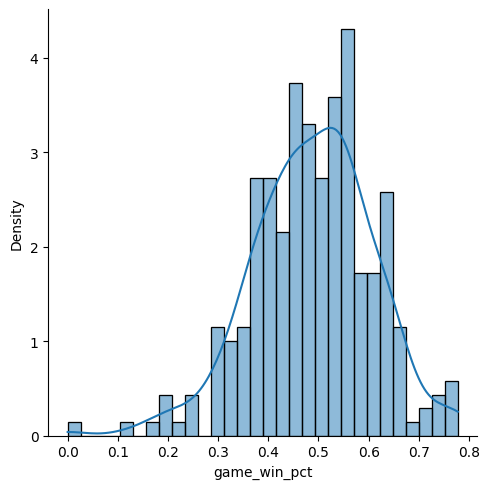

In [63]:
sns.displot(df["game_win_pct"], stat="density", bins=30, kde=True)

### distribution of player win percentage (in matches)

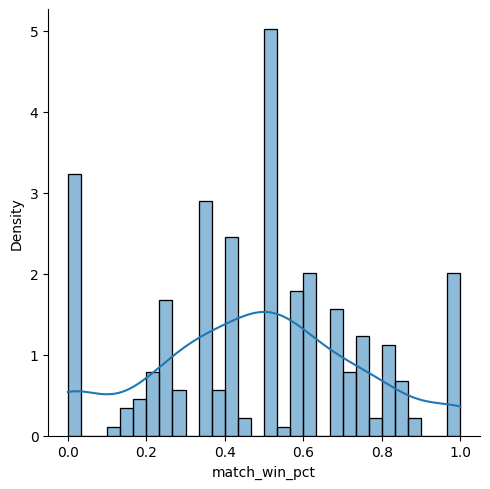

In [64]:
sns.displot(df["match_win_pct"], stat="density", bins=30, kde=True)

### grouped by handicap
win rate increases with handicap

<AxesSubplot:xlabel='handicap'>

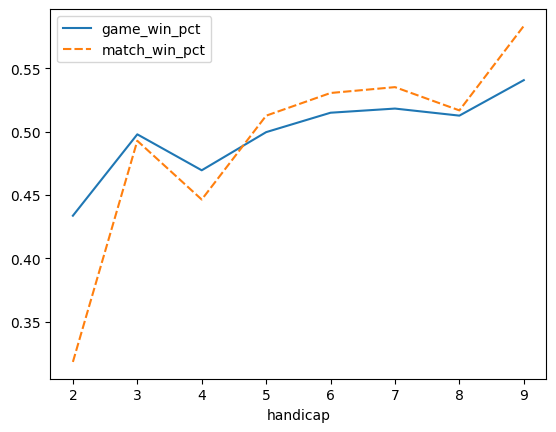

In [65]:
by_handicap = df.drop(["team_id"], axis=1).groupby(by="handicap").sum(numeric_only=True)
by_handicap["game_win_pct"] = by_handicap["game_win_wpct"] / (by_handicap["game_wins"] + by_handicap["game_losses"])
by_handicap["match_win_pct"] = by_handicap["match_win_wpct"] / (by_handicap["match_wins"] + by_handicap["match_losses"])
sns.lineplot(data=by_handicap[["game_win_pct", "match_win_pct"]])

### How many stdevs away from the handicap average a player is

i.e. how good a player is relative to their handicap. This is to prevent us weighting higher-handicapped players too much (since we expect them to do better).

In [66]:
match_win_pct_by_handicap = by_handicap.to_dict()["match_win_pct"]
df["match_win_pct_deviation_from_handicap_avg"] = (
    df["match_win_pct"]  
    - df["handicap"].apply(lambda x: match_win_pct_by_handicap[x])
)

match_win_pct_deviation_stdev_weighted = np.sqrt(
       (
           df["match_win_pct_deviation_from_handicap_avg"] ** 2
           * (df["match_wins"] + df["match_losses"])
       ).sum()
    / (df["match_wins"] + df["match_losses"]).sum()
)

df["stdevs_from_handicap_avg"] = (
    df["match_win_pct_deviation_from_handicap_avg"] 
    / match_win_pct_deviation_stdev_weighted
)

df.nlargest(20, "stdevs_from_handicap_avg")

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,match_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg
171,25,Saurabh Baisane,4,27,9,5,0,0.750000,1.000,27.0,5.0,0.553691,2.333593
217,32,Patricia Arroyo,4,14,7,3,0,0.666667,1.000,14.0,3.0,0.553691,2.333593
17,3,Lakshmi Babureddy,3,18,11,4,0,0.620690,1.000,18.0,4.0,0.507317,2.138144
29,5,Jamie Anderson,3,15,10,3,0,0.600000,1.000,15.0,3.0,0.507317,2.138144
79,12,Sherrie Mark,3,12,6,3,0,0.666667,1.000,12.0,3.0,0.507317,2.138144
149,22,Maria Pederson,3,15,11,4,0,0.576923,1.000,15.0,4.0,0.507317,2.138144
15,3,Lutz Jacob,5,30,17,6,0,0.638298,1.000,30.0,6.0,0.487500,2.054623
127,19,Ben Boucher,5,19,15,4,0,0.558824,1.000,19.0,4.0,0.487500,2.054623
141,21,Adrian Hiotis,5,18,6,3,0,0.750000,1.000,18.0,3.0,0.487500,2.054623
148,22,Troy Holden,5,24,15,4,0,0.615385,1.000,24.0,4.0,0.487500,2.054623


### top players

weight the number of stdevs from handicap avg by matches played--a lot of people played only one match and won.

In [67]:
df["player_score"] = (
    df["stdevs_from_handicap_avg"]
    * (df["match_wins"] + df["match_losses"]) ** matches_played_exponent
)

df.nlargest(20, "player_score")

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,match_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg,player_score
211,31,Tim Burns,6,44,20,7,0,0.687500,1.000000,44.0,7.0,0.469595,1.979158,5.236361
171,25,Saurabh Baisane,4,27,9,5,0,0.750000,1.000000,27.0,5.0,0.553691,2.333593,5.218073
15,3,Lutz Jacob,5,30,17,6,0,0.638298,1.000000,30.0,6.0,0.487500,2.054623,5.032777
49,8,Katya Slepoy,3,37,11,7,1,0.770833,0.875000,37.0,7.0,0.382317,1.611318,4.557495
269,40,Daniel Ilibassi,6,33,17,5,0,0.660000,1.000000,33.0,5.0,0.469595,1.979158,4.425533
156,23,Brad Fels,7,28,12,5,0,0.700000,1.000000,28.0,5.0,0.464968,1.959660,4.381932
257,38,Alan Gil,7,25,10,5,0,0.714286,1.000000,25.0,5.0,0.464968,1.959660,4.381932
17,3,Lakshmi Babureddy,3,18,11,4,0,0.620690,1.000000,18.0,4.0,0.507317,2.138144,4.276288
149,22,Maria Pederson,3,15,11,4,0,0.576923,1.000000,15.0,4.0,0.507317,2.138144,4.276288
127,19,Ben Boucher,5,19,15,4,0,0.558824,1.000000,19.0,4.0,0.487500,2.054623,4.109245


### grouped by team, "best" teams first

In [68]:
by_team = by_team[["match_wins", "match_losses"]].groupby(by="team_id").sum(numeric_only=True)
by_team["match_win_pct"] = (
    by_team["match_wins"] 
    / (by_team["match_wins"] + by_team["match_losses"])
)
by_team.sort_values("match_win_pct", ascending=False)

,match_wins,match_losses,match_win_pct
team_id,,,
32,26,10,0.722222
3,25,11,0.694444
22,24,12,0.666667
31,24,12,0.666667
40,24,13,0.648649
1,23,13,0.638889
19,22,14,0.611111
18,22,15,0.594595
16,21,16,0.567568


## Team we are playing this week

In [70]:
team_id=df[df["name"] == "Seth Rubin"]["team_id"].iloc[0]
df[df["team_id"] == team_id].sort_values("stdevs_from_handicap_avg", ascending=False)

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,match_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg,player_score
185,27,Jennifer Mary,3,18,15,3,2,0.545455,0.60,18.0,3.0,0.107317,0.452300,1.011373
186,27,Thuy Tran,4,12,15,2,2,0.444444,0.50,12.0,2.0,0.053691,0.226288,0.452576
188,27,Merril Jeffs,5,10,16,1,3,0.384615,0.25,10.0,1.0,-0.262500,-1.106335,-2.212671
190,27,Jeff Diers,5,12,22,1,3,0.352941,0.25,12.0,1.0,-0.262500,-1.106335,-2.212671
191,27,Seth Rubin,4,12,25,0,5,0.324324,0.00,12.0,0.0,-0.446309,-1.881018,-4.206083
192,27,Sabine Lafleur,3,8,19,0,4,0.296296,0.00,8.0,0.0,-0.492683,-2.076467,-4.152934
187,27,Shan Sengottaiyan,5,13,20,0,4,0.393939,0.00,13.0,0.0,-0.512500,-2.159988,-4.319976
189,27,Dagm Zegeye,5,19,33,0,6,0.365385,0.00,19.0,0.0,-0.512500,-2.159988,-5.290868
